In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# import sqlite3

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv("projectdata.csv")

In [4]:
data.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7.0,5,1,97.244041
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10.0,2,0,100.000000
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13.0,3,0,100.000000
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,NaN,8,1,100.000000
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9.0,0,1,95.182643


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5808 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5808 non-null   float64
 6   O3                   5810 non-null   float64
 7   Temperature          5809 non-null   float64
 8   Humidity             5810 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5806 non-null   float64
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 635.7 KB


In [7]:
# Check for null values in each column

null_values = data.isnull().sum()

# Display the result

print(f"Null Values in each Column: \n\n{null_values}")

Null Values in each Column: 

RecordID               0
AQI                    3
PM10                   0
PM2_5                  0
NO2                    0
SO2                    3
O3                     1
Temperature            2
Humidity               1
WindSpeed              0
RespiratoryCases       5
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
dtype: int64


In [8]:
# replacing empty values with median

data = data.fillna(data.median())

# Check for null values in each column

null_values = data.isnull().sum()

# Display the result:

print(f"Null values in each column:\n\n{null_values}")

Null values in each column:

RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
dtype: int64


In [9]:
# print(data.dtypes)

data['AQI'] = pd.to_numeric(data['AQI'], errors='coerce')
print()

print(data.dtypes)


RecordID                 int64
AQI                    float64
PM10                   float64
PM2_5                  float64
NO2                    float64
SO2                    float64
O3                     float64
Temperature            float64
Humidity               float64
WindSpeed              float64
RespiratoryCases       float64
CardiovascularCases      int64
HospitalAdmissions       int64
HealthImpactScore      float64
dtype: object


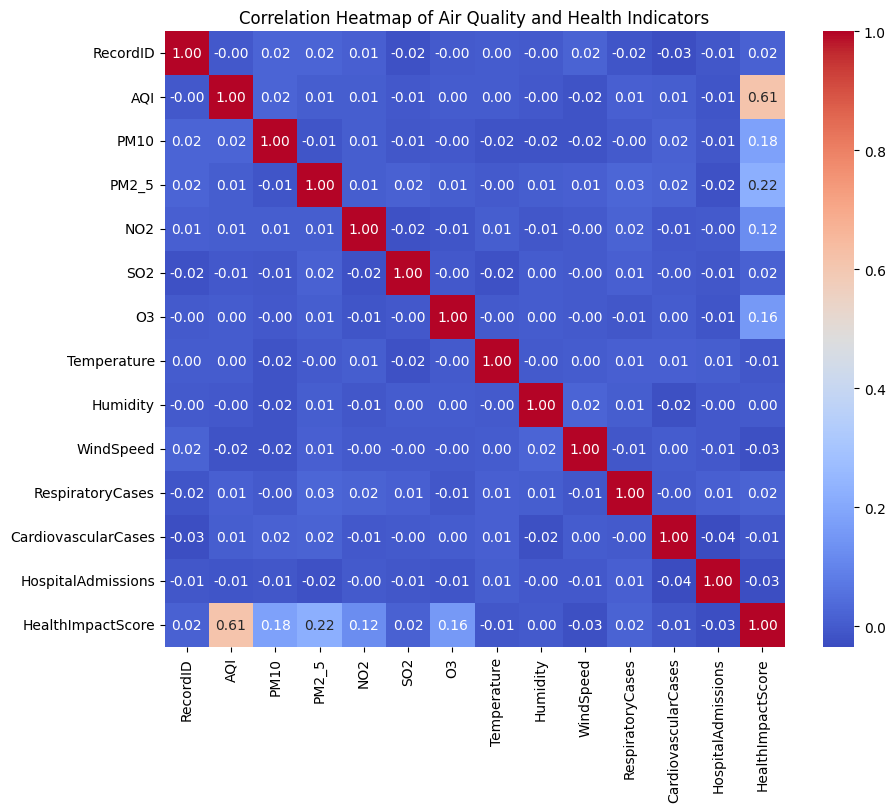

In [10]:
correlation_matrix = data.corr()

# Plot the heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap of Air Quality and Health Indicators")
plt.show()